# NOTE

# IMPORTS

In [1]:
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD
from keras import backend as K
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras import models
from imutils import paths
from keras import layers
import numpy as np
import cv2
import os

Using TensorFlow backend.


# LOAD DATASET

## Global

In [2]:
lb = LabelBinarizer()

## Helper

In [3]:
# Resize processor
def img_resize(img, width, height, interpolation):
    inter = interpolation
    return cv2.resize(img, (width, height), inter)

# Image to array processor
def img2array(img, dataFormat=None):
    return img_to_array(img, data_format=dataFormat)

# Image loader: 
    # This method return a network ready data, by passing data through preprocessors
def img_load(img_paths, verbose=1):
#     data = []
    images = []
#     inter = cv2.INTER_AREA
    
    print('[INFO] loading...')
    for (i, img_path) in enumerate(img_paths):
        img = cv2.imread(img_path)
        images.append(img)
        
        # Console Followup
        if i > 0 and verbose > 0 and (i + 1) % verbose == 0:
            print('[INFO] loaded {}/{}'.format((i + 1), len(img_paths)))
  
    # Convert images list into numpy array
    images = np.array(images)
    
    return images

# Image processor
def img_processor(imgs):
    data = []
    inter = cv2.INTER_AREA
       
    # Process images and store them in data container
    print('[INFO] processing images...')
    for image in images:
        image = img_resize(image, 32, 32, inter)
        image = img2array(image)
        data.append(image)
    
    # Convert data into numpy array
    data = np.array(data)
    
    # Scale the pixels intensity [0, 1]
    data = data.astype('float') / 255.0
    
    return data

# Label Extractor
def extract_label(img_dir, img_paths):
    labels = []
    
    for path in img_paths:
        image_name = path[len(img_dir):]
        label = image_name[:3]
        labels.append(label)
    
    # Convert labels list to numpy array
    labels = np.array(labels)
    
    return labels

## Images

In [4]:
# Acquire Paths
images_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/All/'
images_path = list(paths.list_images(images_dir))

# Shuffle Paths
images_path = shuffle(images_path)

# Images
images = img_load(images_path, verbose=1250)

[INFO] loading...
[INFO] loaded 1250/25000
[INFO] loaded 2500/25000
[INFO] loaded 3750/25000
[INFO] loaded 5000/25000
[INFO] loaded 6250/25000
[INFO] loaded 7500/25000
[INFO] loaded 8750/25000
[INFO] loaded 10000/25000
[INFO] loaded 11250/25000
[INFO] loaded 12500/25000
[INFO] loaded 13750/25000
[INFO] loaded 15000/25000
[INFO] loaded 16250/25000
[INFO] loaded 17500/25000
[INFO] loaded 18750/25000
[INFO] loaded 20000/25000
[INFO] loaded 21250/25000
[INFO] loaded 22500/25000
[INFO] loaded 23750/25000
[INFO] loaded 25000/25000


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## Labels

In [5]:
# Extract labels
labels = extract_label(images_dir, images_path)


# Binarize labels special for feedforwad network
labels = lb.fit_transform(labels)
labels.shape

(25000, 1)

## Data

In [6]:
# Pass images to image processors to get network data
data = img_processor(images)
data.shape

[INFO] processing images...


(25000, 32, 32, 3)

## Data Splitting

In [7]:
# Extract 5000 data points for test samples and labels from data and labels
(train_samples, testX, train_labels, testY) = train_test_split(data, labels, test_size=0.2)

# Extract 5000 data points for validation samples and labels from train_samples and train_labels
(trainX, validationX, trainY, validationY) = train_test_split(train_samples, train_labels, test_size=0.25)

# ARCHITECTURE

In [8]:
width = 32
height = 32
depth = 3
stride = (3, 3)
filters = 32
input_shape = (width, height, depth)

if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, height)

model = models.Sequential()
model.add(layers.Conv2D(32, stride, padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32769     
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


# COMPILE AND TRAIN

In [9]:
opt = SGD(0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(validationX, validationY))

Train on 15000 samples, validate on 5000 samples
Epoch 1/100
15000/15000 [==============================] - 20s 1ms/step - loss: 0.6840 - acc: 0.5665 - val_loss: 0.6665 - val_acc: 0.5780
Epoch 2/100
15000/15000 [==============================] - 7s 477us/step - loss: 0.6567 - acc: 0.6126 - val_loss: 0.6521 - val_acc: 0.6138
Epoch 3/100
15000/15000 [==============================] - 7s 436us/step - loss: 0.6397 - acc: 0.6415 - val_loss: 0.6517 - val_acc: 0.6088
Epoch 4/100
15000/15000 [==============================] - 6s 412us/step - loss: 0.6241 - acc: 0.6620 - val_loss: 0.6169 - val_acc: 0.6748
Epoch 5/100
15000/15000 [==============================] - 5s 359us/step - loss: 0.6057 - acc: 0.6818 - val_loss: 0.6069 - val_acc: 0.6750
Epoch 6/100
15000/15000 [==============================] - 5s 364us/step - loss: 0.5903 - acc: 0.6959 - val_loss: 0.5959 - val_acc: 0.6886
Epoch 7/100
15000/15000 [==============================] - 5s 359us/step - loss: 0.5764 - acc: 0.7067 - val_loss: 0.57

15000/15000 [==============================] - 7s 439us/step - loss: 0.3528 - acc: 0.8517 - val_loss: 0.5699 - val_acc: 0.7300
Epoch 60/100
15000/15000 [==============================] - 6s 377us/step - loss: 0.3491 - acc: 0.8537 - val_loss: 0.5875 - val_acc: 0.7272
Epoch 61/100
15000/15000 [==============================] - 6s 372us/step - loss: 0.3480 - acc: 0.8495 - val_loss: 0.5788 - val_acc: 0.7246
Epoch 62/100
15000/15000 [==============================] - 7s 440us/step - loss: 0.3444 - acc: 0.8555 - val_loss: 0.6158 - val_acc: 0.7206
Epoch 63/100
15000/15000 [==============================] - 6s 390us/step - loss: 0.3418 - acc: 0.8542 - val_loss: 0.5720 - val_acc: 0.7282
Epoch 64/100
15000/15000 [==============================] - 6s 408us/step - loss: 0.3381 - acc: 0.8570 - val_loss: 0.5828 - val_acc: 0.7226
Epoch 65/100
15000/15000 [==============================] - 6s 372us/step - loss: 0.3366 - acc: 0.8583 - val_loss: 0.5815 - val_acc: 0.7310
Epoch 66/100
15000/15000 [=======

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# PLOT TRAIN HISTORY

In [11]:
# Data
epochs = np.arange(0, 100)

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

## Accuracy

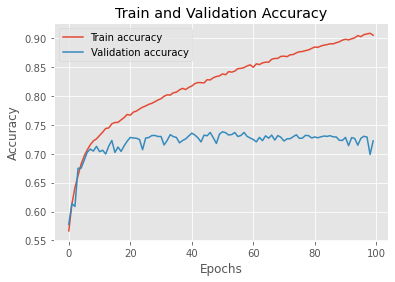

In [12]:
plt.style.use('ggplot')
plt.plot(epochs, accuracy, label='Train accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

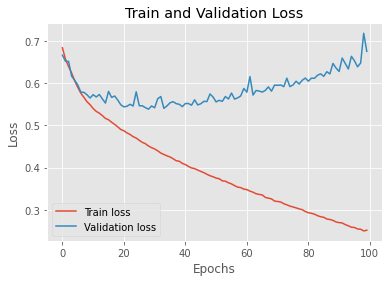

In [13]:
plt.clf()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATION

In [14]:
result = model.evaluate(testX, testY)
result

5000/5000 [==============================] - 1s 217us/step


[0.6618949712753296, 0.727400004863739]

# SERIALIZE A MODEL

In [15]:
model.save('shallowNet_III_weights.hdf5')